# OOP SIMULATION WITH C 

<br>
<br>
   Since C is not an object-oriented language, it does not have features such as Class Methodology, Encapsulation, Inheritance, and Polymorphism that C ++ and other object-oriented languages have.However, these structures can be achieved using struct and function pointers.

The main subject of the project is to develop a C program with Shares, Bank structure using OOP simulation.

Note:The codes are located in this repo, in folders named according to the language in which they are written.

## Structs

Structs is a collection of different types of variables.They cannot contain any type other than variables (like a function).
<br>
C++ classes contain variables and methods.These variables and methods can be accessed with objects created from the class(According to private and public definitions).

A simple C struct defined in the .h file must look like this:

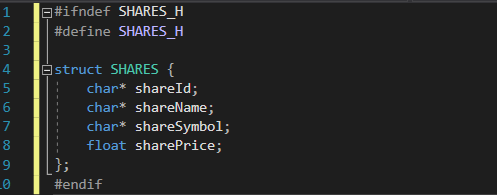

The C ++ code for this example is as follows:

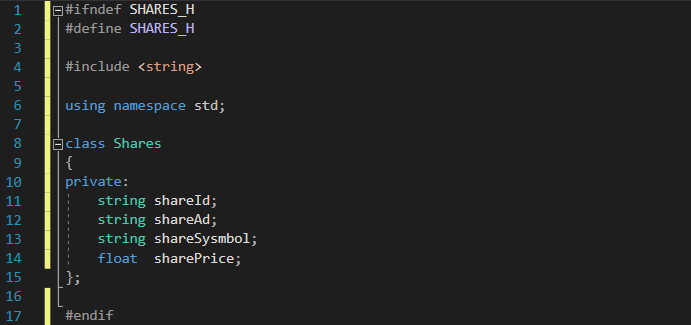

-Since the C language does not include the string type, char pointer is used instead.
<br>
-Because C++ contains private and public members (default private), the most valuable data is called private.This way, any object created outside of this class cannot access these members.
<br>

In C++, private or public functions of the class can be declared directly in the class.Since these files are .h files, they do not contain a function body.
<br>
Since C structs can only contain variables, they cannot contain function declarations.Function pointers are used so that functions to be defined in the struct can only be accessed from this.

## Function Pointers /.h Files

The structure of function pointers is as follows:

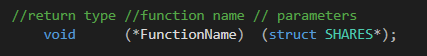

After the function pointer is defined in the struct, another function to be accessed from outside is defined with this function. This defined function must be outside the struct in order to provide access.

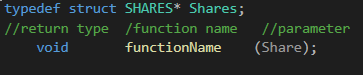

The binding of these functions will be shown later.

In C ++, the function definition is done in this way:

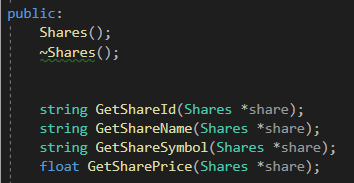

Comparison of the two codes:

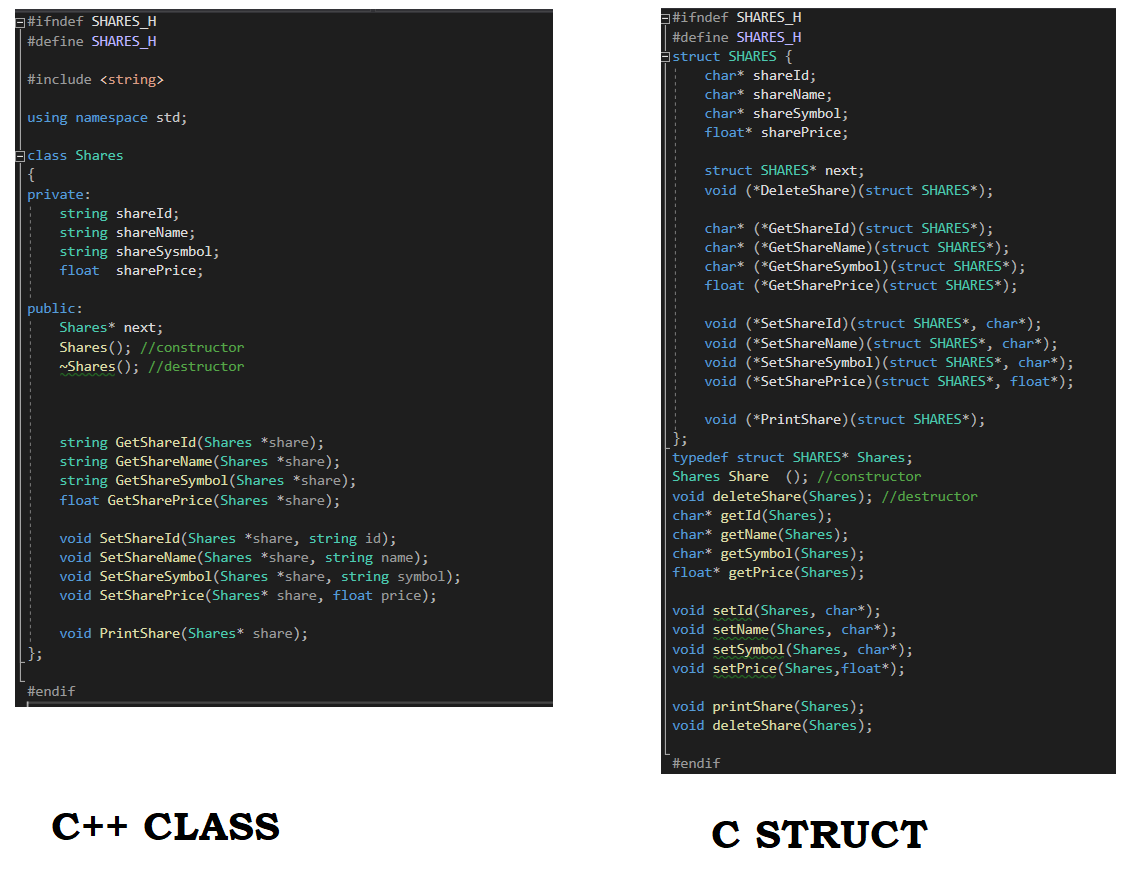

In order to model Encapsulation, which is one of the features of object-oriented programming, get and set methods are defined to access members.

<b>Encapsulation:<b>It is the manipulation of data with written functions. Fields are private and the functions that manipulate them are public.

Here, Encapsulation is provided by accessing class and struct members with get methods and assigning values ​​to these members with set methods.

Function bodies were defined in .c and .cpp files after the .h files were completed.

## Function Bodies/ .c And .cpp Files

The bodies of the functions defined in the .h file in the .cpp file are as follows. All of them are in this repository, only the constructor and a get set method are explained here for the comprasion with .c files.

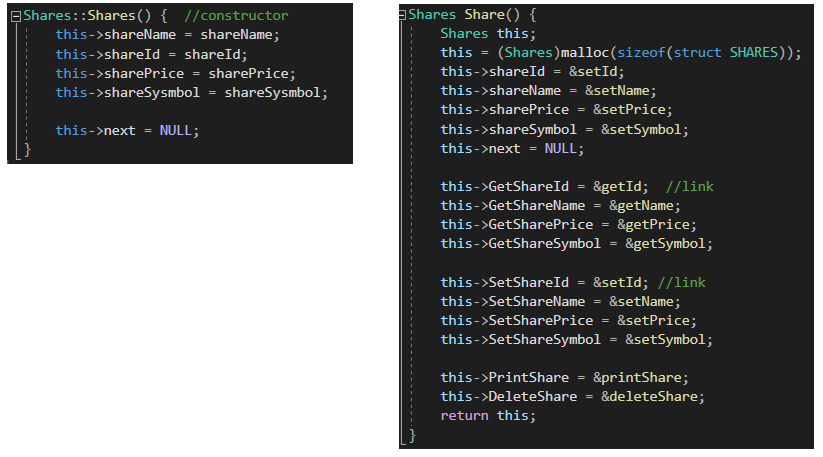

In C ++, changes can be made on the members belonging to the object by using the "this" word.However, since there is no this word in C language, the variable created in the heap memory with malloc is called "this" to simulate it.
<br>
The size of the variable created in C should be the size of the struct to be used.
<br>
<br>
In C++, variables can be assigned directly to the members with the this word, while in C language this is provided by the addresses of the return values of the set functions.
<br>
<br>
With the object created from the C++ class, the functions of that class are accessed. In order to make this simulation on C, the functions that can be accessed directly in the program where the .h is added are connected to the function pointers defined in the .h file.

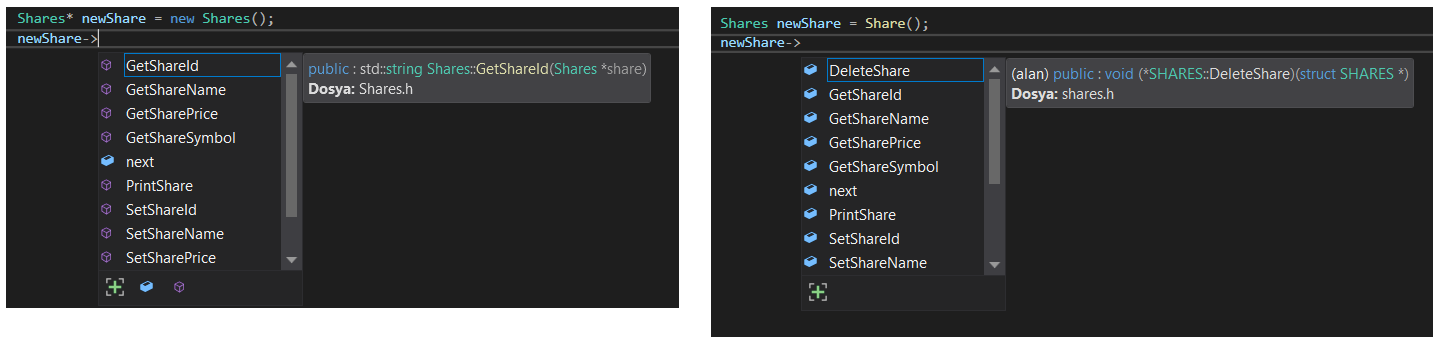

On the left side, creating an object with C ++ is shown. The functions belonging to that class can be accessed through this object. It should be noted that the accessed functions are shown as methods by VS.This part is important in comparison with C.

On the right, the variable produced by the struct is shown. For this comparison, it can be called an "object".Previously, using the typedef, the name struct SHARES* was defined as Shares. So while it is defined as a pointer in C++, it does not need to be defined as a pointer again in C.
<br>
With this created C struct "object", the variables defined as function pointers in the struct can be accessed.
<br>
VS shows the methods of the object as methods in C++, while it shows it as variables in C.It has been mentioned before that structs cannot have functions, so function definitions can be made using only function pointers.

The situation in the Get and Set methods is as follows:

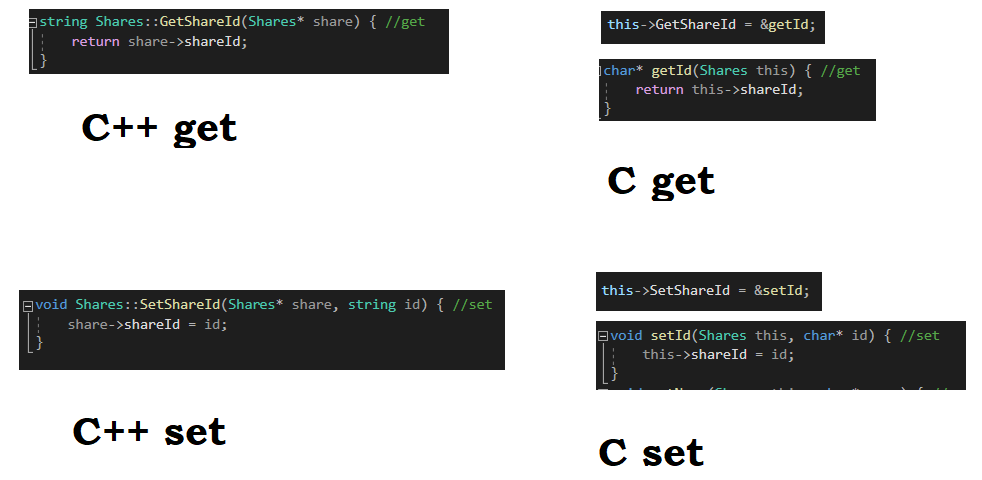

The main idea is to define the get and set methods are almost the same. Since there is no string structure in C, the return type of the function is a char pointer.

The other difference is that in C++, class functions are accessed directly from the object created from the class, without requiring any additional assignments.In C, 1 function and 1 function pointer are needed to do this.It was mentioned that even this way, it still appears as a struct variable, not a method.
<br>
Because the member called through struct is a function pointer, not a class method like in C ++.

Looking back at the C struct after all these annotations, the .h file contains the following:

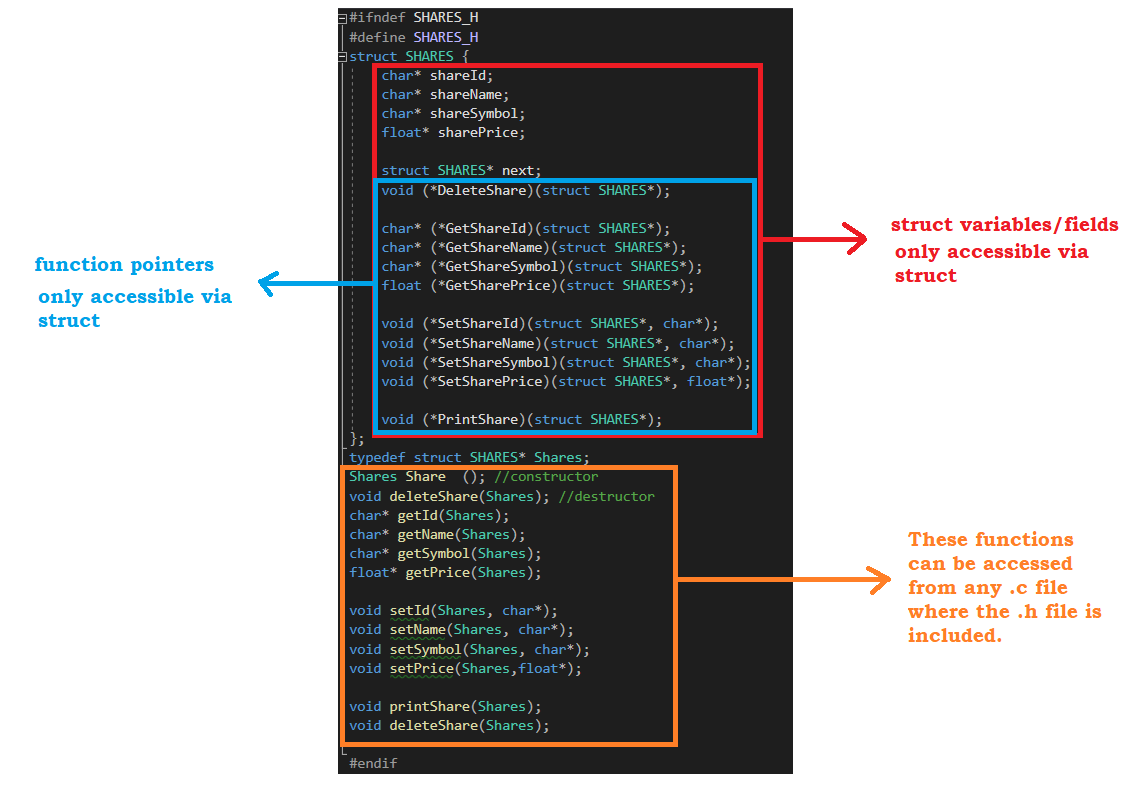

After the object structure was established on C, the next part of the project was continued using only the C language.C++ codes can be found at this repository at .cpp directory.

## SHARES

In fact, .h and a few methods of the shares structure were mentioned above.An unmentioned variable was *next.
<br>
The purpose of defining this is to ensure that the Bank structure can keep the shares in order.
<br>
It is not known how many Shares will be read from the JSON file.The most flexible and accessible way to keep an unknown number of structures is to use a linked list.
<br>
Each Share must have a *next pointer as it is planned that the linked list will be created in the Bank structure.

### Linked List:

Linked lists, which are basically based on the previous node showing the other, can be symbolized as follows:

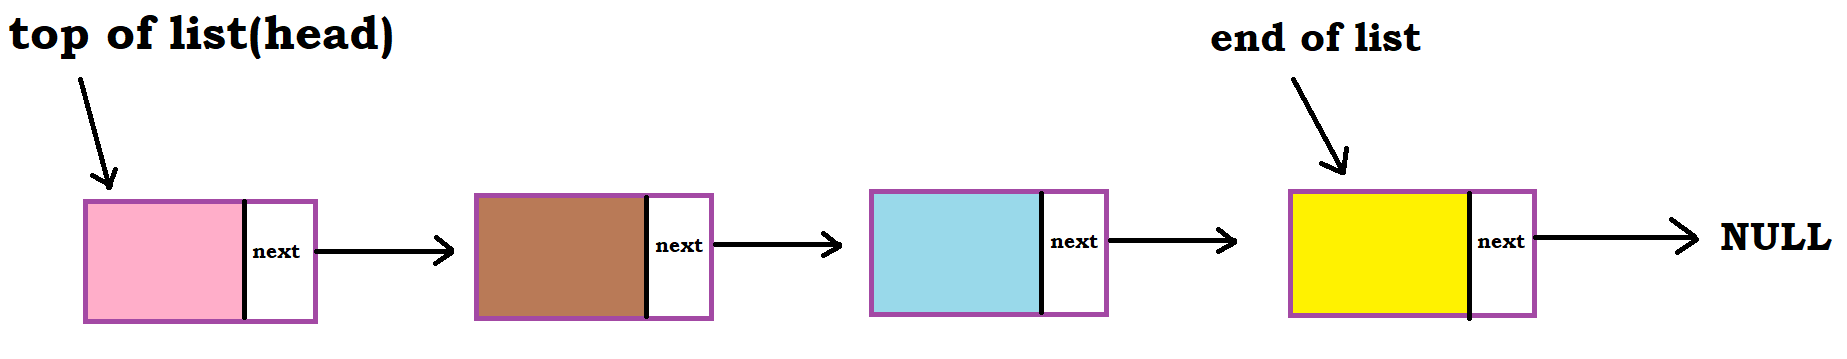

The nodes here are the structs for this project, but will be classes for C ++.
<br>
It is very important to keep the top of the list on the Linked list because the whole list depends on that pointer.When the list head is deleted, the whole list is lost.
<br>
The loss here is that the list becomes inaccessible, not deleted from the heap.Linked lists that are not properly freed will cause garbage.This will be discussed later.

Optionally, only the top of the list can be kept, but keeping the end of the list also increases the management.

All code of the Share structure is accessible from within this repository.


## BANK

The structure planned for the bank is to keep the shares as a linked list, since the number of shares is unknown.
<br>
It is not necessary to specify any capacity when defining.It is one of the data structures I use the most because it is easy to access, easy to add and remove a new node.

## bank.h

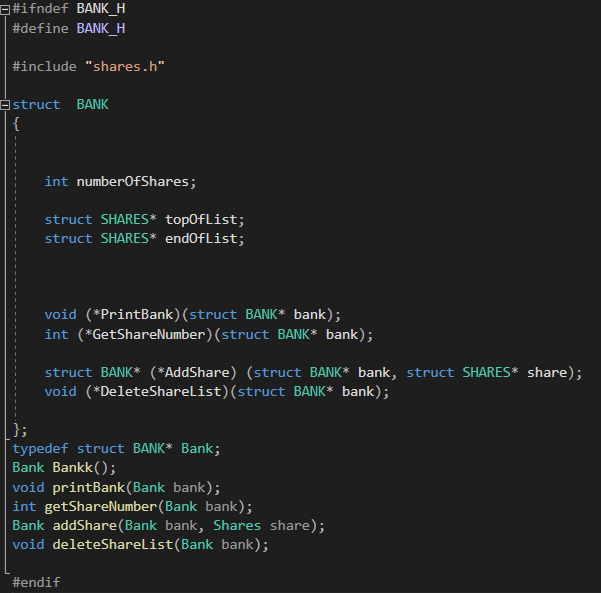

The first thing to notice in the bank's .h file is the variables defined in the "struct SHARES*" type.These defined pointers are for a linked list of Shares.
<br>
These defined pointers are of the Shares type and are also members of the Bank.In other words, these pointers can be accessed through the Bank.

Another notable issue may be the constructor function, which cannot be defined with the same name as the struct.Since structs do not have any constructor functions, a function definition cannot be made with the same name as a struct.

## bank.c

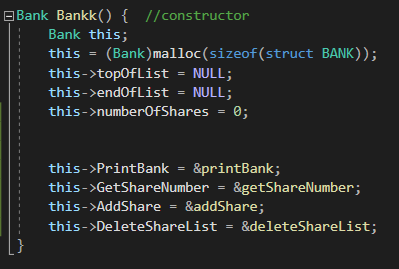

It is the same method used in Share, functions accessible from anywhere are assigned to the function pointers defined in the struct.This way functions are accessible via struct, not wherever .h is included.

## Adding Shares to A Linked List

Since both the top of the list and the end of the list will be kept, it will be more understandable to examine the function in 2 separate parts.

### If the bank is empty:

When the list is empty, the only thing to do is for top of list and end of list to show the newly added node.
<br>
Of course,the number of shares must be updated to 1.

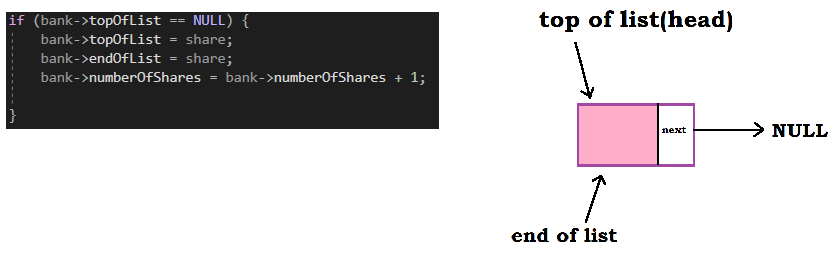

### If bank is not empty:

When the bank is not empty, each node to be added will follow the end of the list.

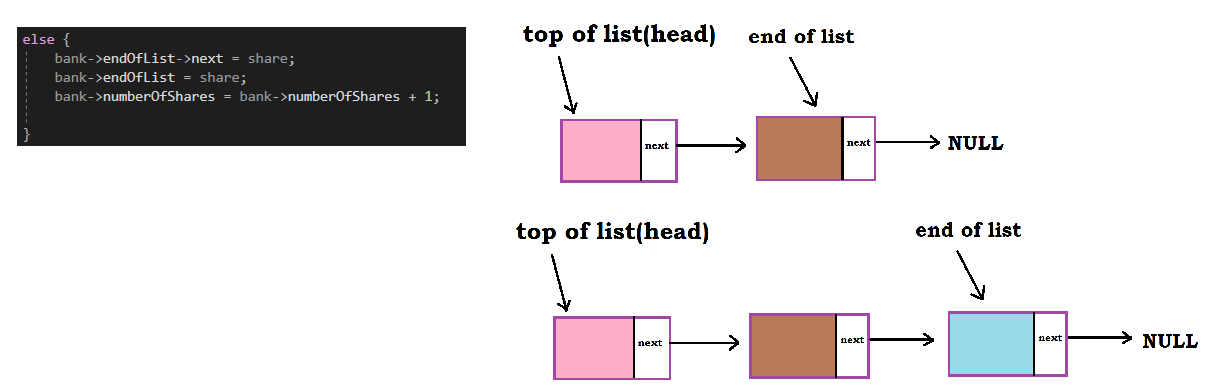

<br>
<br>
<br>

The printing of the shares in the bank is done by assigning a pointer to temporarily hold the first node of the list and then traverse the list by this pointer.

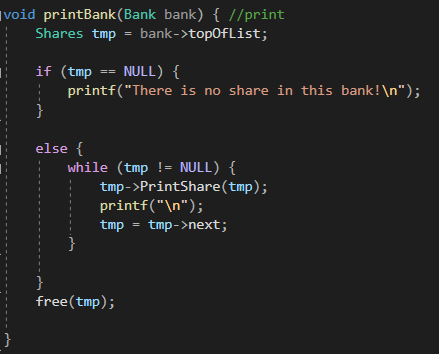

Previously, it was mentioned that the members added to the linked list should be deleted correctly.
Members that are not deleted correctly cause garbage accumulation.

If the pointer directly at the top of the list is deleted, the list cannot be accessed again and the nodes that are not deleted there remain as garbage. To prevent this, each node should be deleted by traversing the list sequentially.

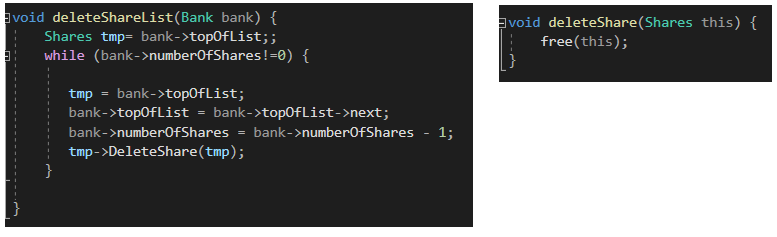

To test the functions, the following code was written in main using randomly named variables:

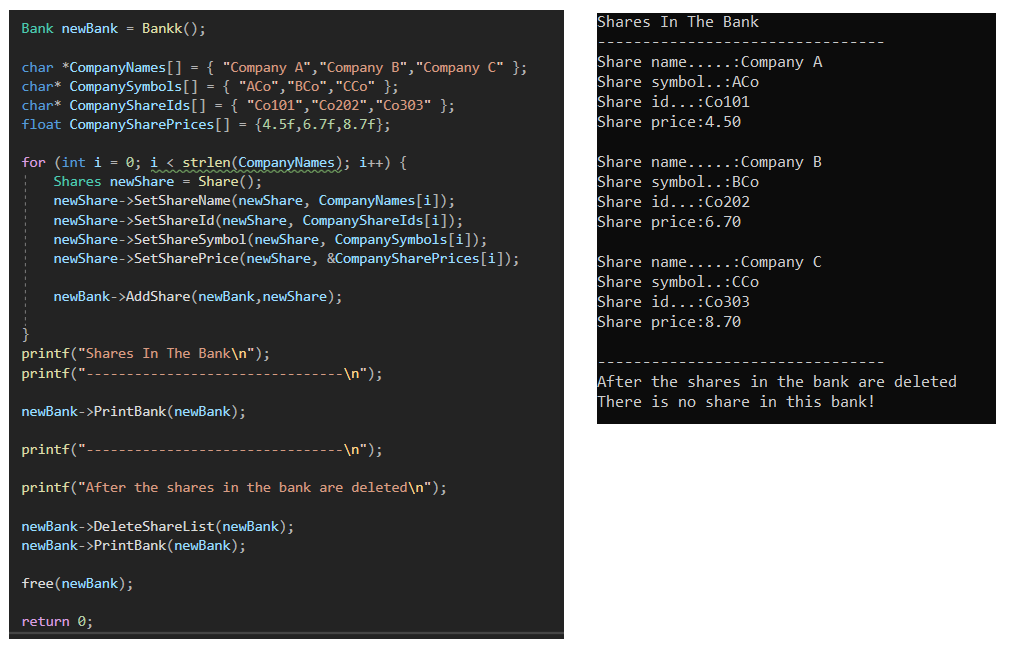

## Makefile

Although the codes to show the accesses are written in Visual Studio, the makefile is a part that should not be skipped.
<br>

The folder layout is as follows:

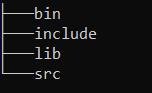

.h files are in include, .c files are in src, .o files are in lib, and executables are in .exe bin.

Example make file is as follows, Mingw is used to compile the files:

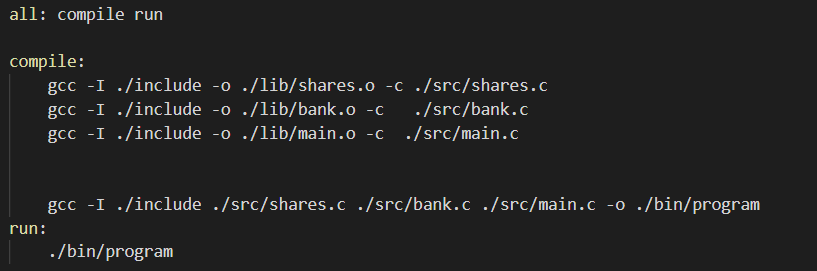